In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
DATA_DIR = '../pickles'

In [3]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_normalized.pkl'))
df.head(10)

,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,2017-09-28 10:15:00,38.5,-0.324687,-0.487027,0.433465,0.167023,-1.039505,0.375594,0.898638,0.0
1,2017-09-28 10:30:00,32.3,-0.343192,-0.325877,-0.412283,0.083982,-1.094050,0.375594,0.946776,0.0
2,2017-09-28 10:45:00,38.5,-0.010107,-0.161505,-0.198236,0.065528,-0.984961,0.375594,0.970844,0.0
3,2017-09-28 11:00:00,29.7,-0.386370,-0.554710,-0.339194,-0.063647,-0.984961,0.356064,1.091187,0.0
4,2017-09-28 11:15:00,19.4,-0.386370,-0.422567,-0.412283,-0.146688,-1.203138,0.375594,1.163393,0.0
5,2017-09-28 11:30:00,10.8,-0.386370,-0.619170,-0.412283,-0.238957,-1.039505,0.375594,1.259668,0.0
6,2017-09-28 11:45:00,12.4,-0.386370,-0.586940,-0.412283,-0.358905,-1.203138,0.375594,1.283736,0.0
7,2017-09-28 12:00:00,12.3,-0.386370,-0.619170,-0.412283,-0.405039,-1.148594,0.375594,1.307805,0.0
8,2017-09-28 12:15:00,9.7,-0.386370,-0.619170,-0.412283,-0.423493,-1.312227,0.356064,1.355942,0.0
9,2017-09-28 12:30:00,13.8,-0.386370,-0.619170,-0.412283,-0.552668,-1.475859,0.356064,1.548491,0.0


In [4]:
def from_dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))


def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [5]:
def mlp(input_shape, loss='mse', optimizer='adam'):
    model = Sequential()

    model.add(Dense(32, input_dim=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    return model

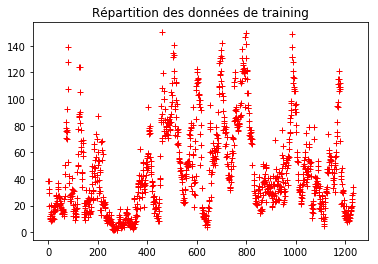

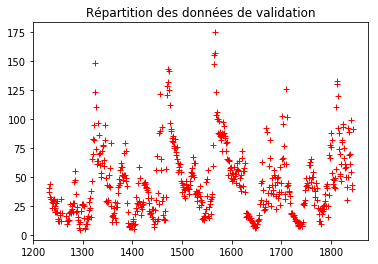

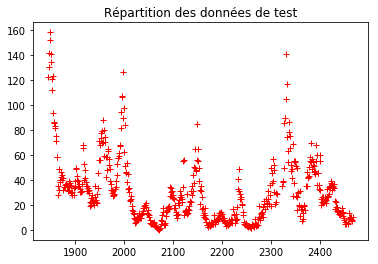

In [6]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [7]:
# BEST val_loss: 84.0475, 32 units, batch_size=32
model = mlp(X_train.shape[1])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 0s 238us/step - loss: 3214.3260 - val_loss: 2806.1839
Epoch 2/1000
1206/1206 [==============================] - 0s 35us/step - loss: 3207.6058 - val_loss: 2799.2635
Epoch 3/1000
1206/1206 [==============================] - 0s 35us/step - loss: 3198.1879 - val_loss: 2790.0032
Epoch 4/1000
1206/1206 [==============================] - 0s 35us/step - loss: 3184.5714 - val_loss: 2777.3341
Epoch 5/1000
1206/1206 [==============================] - 0s 35us/step - loss: 3165.8473 - val_loss: 2759.9401
Epoch 6/1000
1206/1206 [==============================] - 0s 36us/step - loss: 3140.9607 - val_loss: 2739.1898
Epoch 7/1000
1206/1206 [==============================] - 0s 36us/step - loss: 3111.2411 - val_loss: 2714.4996
Epoch 8/1000
1206/1206 [==============================] - 0s 35us/step - loss: 3076.4898 - val_loss: 2686.2859
Epoch 9/1000
1206/1206 [==============================] - 0s 34u

1206/1206 [==============================] - 0s 39us/step - loss: 340.8609 - val_loss: 412.4206
Epoch 75/1000
1206/1206 [==============================] - 0s 35us/step - loss: 335.4609 - val_loss: 406.9959
Epoch 76/1000
1206/1206 [==============================] - 0s 35us/step - loss: 330.1460 - val_loss: 402.8662
Epoch 77/1000
1206/1206 [==============================] - 0s 35us/step - loss: 325.1019 - val_loss: 397.6072
Epoch 78/1000
1206/1206 [==============================] - 0s 38us/step - loss: 320.0361 - val_loss: 393.1573
Epoch 79/1000
1206/1206 [==============================] - 0s 36us/step - loss: 315.2440 - val_loss: 389.4057
Epoch 80/1000
1206/1206 [==============================] - 0s 35us/step - loss: 310.5752 - val_loss: 384.8424
Epoch 81/1000
1206/1206 [==============================] - 0s 36us/step - loss: 306.0296 - val_loss: 380.1961
Epoch 82/1000
1206/1206 [==============================] - 0s 34us/step - loss: 301.4921 - val_loss: 376.8921
Epoch 83/1000
1206/1206 

1206/1206 [==============================] - 0s 36us/step - loss: 143.5725 - val_loss: 207.6074
Epoch 149/1000
1206/1206 [==============================] - 0s 35us/step - loss: 142.5576 - val_loss: 205.5827
Epoch 150/1000
1206/1206 [==============================] - 0s 34us/step - loss: 141.6147 - val_loss: 203.6380
Epoch 151/1000
1206/1206 [==============================] - 0s 35us/step - loss: 140.5259 - val_loss: 201.7308
Epoch 152/1000
1206/1206 [==============================] - 0s 33us/step - loss: 139.5412 - val_loss: 199.3515
Epoch 153/1000
1206/1206 [==============================] - 0s 34us/step - loss: 138.5898 - val_loss: 197.8708
Epoch 154/1000
1206/1206 [==============================] - 0s 35us/step - loss: 137.6313 - val_loss: 195.2957
Epoch 155/1000
1206/1206 [==============================] - 0s 34us/step - loss: 136.7349 - val_loss: 193.8355
Epoch 156/1000
1206/1206 [==============================] - 0s 35us/step - loss: 135.8565 - val_loss: 191.5657
Epoch 157/1000
1

Epoch 222/1000
1206/1206 [==============================] - 0s 35us/step - loss: 107.4381 - val_loss: 125.6268
Epoch 223/1000
1206/1206 [==============================] - 0s 34us/step - loss: 107.2661 - val_loss: 125.4139
Epoch 224/1000
1206/1206 [==============================] - 0s 34us/step - loss: 107.0425 - val_loss: 125.2650
Epoch 225/1000
1206/1206 [==============================] - 0s 34us/step - loss: 106.8538 - val_loss: 125.0240
Epoch 226/1000
1206/1206 [==============================] - 0s 33us/step - loss: 106.6872 - val_loss: 124.8540
Epoch 227/1000
1206/1206 [==============================] - 0s 33us/step - loss: 106.5397 - val_loss: 124.3469
Epoch 228/1000
1206/1206 [==============================] - 0s 33us/step - loss: 106.3129 - val_loss: 123.9043
Epoch 229/1000
1206/1206 [==============================] - 0s 35us/step - loss: 106.1282 - val_loss: 123.4357
Epoch 230/1000
1206/1206 [==============================] - 0s 34us/step - loss: 105.9445 - val_loss: 123.6168
E

1206/1206 [==============================] - 0s 33us/step - loss: 97.0483 - val_loss: 109.6123
Epoch 297/1000
1206/1206 [==============================] - 0s 36us/step - loss: 96.9462 - val_loss: 109.8465
Epoch 298/1000
1206/1206 [==============================] - 0s 33us/step - loss: 96.8552 - val_loss: 109.7880
Epoch 299/1000
1206/1206 [==============================] - 0s 33us/step - loss: 96.7473 - val_loss: 109.4140
Epoch 300/1000
1206/1206 [==============================] - 0s 32us/step - loss: 96.5818 - val_loss: 109.1492
Epoch 301/1000
1206/1206 [==============================] - 0s 33us/step - loss: 96.5014 - val_loss: 108.9885
Epoch 302/1000
1206/1206 [==============================] - 0s 34us/step - loss: 96.3821 - val_loss: 109.0997
Epoch 303/1000
1206/1206 [==============================] - 0s 33us/step - loss: 96.2832 - val_loss: 108.8590
Epoch 304/1000
1206/1206 [==============================] - 0s 33us/step - loss: 96.1434 - val_loss: 108.7898
Epoch 305/1000
1206/1206 

1206/1206 [==============================] - 0s 35us/step - loss: 89.0882 - val_loss: 100.4417
Epoch 371/1000
1206/1206 [==============================] - 0s 34us/step - loss: 88.9681 - val_loss: 100.8090
Epoch 372/1000
1206/1206 [==============================] - 0s 34us/step - loss: 88.8728 - val_loss: 100.2208
Epoch 373/1000
1206/1206 [==============================] - 0s 33us/step - loss: 88.7971 - val_loss: 99.6837
Epoch 374/1000
1206/1206 [==============================] - 0s 32us/step - loss: 88.7426 - val_loss: 100.3291
Epoch 375/1000
1206/1206 [==============================] - 0s 34us/step - loss: 88.5513 - val_loss: 99.9855
Epoch 376/1000
1206/1206 [==============================] - 0s 33us/step - loss: 88.5055 - val_loss: 99.9343
Epoch 377/1000
1206/1206 [==============================] - 0s 33us/step - loss: 88.3701 - val_loss: 99.7856
Epoch 378/1000
1206/1206 [==============================] - 0s 33us/step - loss: 88.3303 - val_loss: 99.5657
Epoch 379/1000
1206/1206 [====

1206/1206 [==============================] - 0s 35us/step - loss: 81.8354 - val_loss: 92.9886
Epoch 446/1000
1206/1206 [==============================] - 0s 35us/step - loss: 81.7448 - val_loss: 92.9680
Epoch 447/1000
1206/1206 [==============================] - 0s 34us/step - loss: 81.6650 - val_loss: 93.2738
Epoch 448/1000
1206/1206 [==============================] - 0s 34us/step - loss: 81.5657 - val_loss: 92.3134
Epoch 449/1000
1206/1206 [==============================] - 0s 33us/step - loss: 81.4886 - val_loss: 92.6552
Epoch 450/1000
1206/1206 [==============================] - 0s 33us/step - loss: 81.4020 - val_loss: 92.8528
Epoch 451/1000
1206/1206 [==============================] - 0s 36us/step - loss: 81.3440 - val_loss: 92.6144
Epoch 452/1000
1206/1206 [==============================] - 0s 35us/step - loss: 81.2802 - val_loss: 92.1720
Epoch 453/1000
1206/1206 [==============================] - 0s 34us/step - loss: 81.1858 - val_loss: 91.9347
Epoch 454/1000
1206/1206 [========

1206/1206 [==============================] - 0s 34us/step - loss: 76.0016 - val_loss: 86.9186
Epoch 521/1000
1206/1206 [==============================] - 0s 36us/step - loss: 75.9123 - val_loss: 86.9580
Epoch 522/1000
1206/1206 [==============================] - 0s 35us/step - loss: 75.8370 - val_loss: 86.9812
Epoch 523/1000
1206/1206 [==============================] - 0s 35us/step - loss: 75.7882 - val_loss: 87.0744
Epoch 524/1000
1206/1206 [==============================] - 0s 35us/step - loss: 75.6882 - val_loss: 87.0001
Epoch 525/1000
1206/1206 [==============================] - 0s 33us/step - loss: 75.6540 - val_loss: 87.2564
Epoch 526/1000
1206/1206 [==============================] - 0s 34us/step - loss: 75.6126 - val_loss: 86.3187
Epoch 527/1000
1206/1206 [==============================] - 0s 34us/step - loss: 75.4919 - val_loss: 86.8535
Epoch 528/1000
1206/1206 [==============================] - 0s 35us/step - loss: 75.4411 - val_loss: 86.5126
Epoch 529/1000
1206/1206 [========

In [8]:
model.evaluate(X_test, y_test, verbose=0)

115.25062187144299

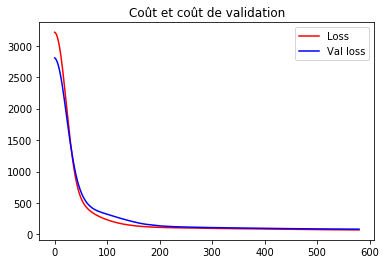

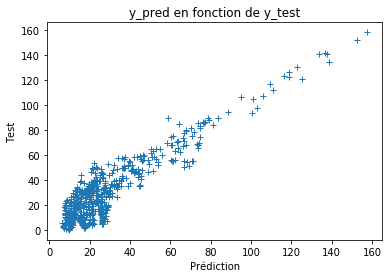

In [9]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()